In [38]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
from sklearn.datasets import load_breast_cancer

In [10]:
data = load_breast_cancer()['data']
cols = load_breast_cancer()['feature_names']

In [15]:
df = pd.DataFrame(data=data, columns=cols)

df['Target'] = load_breast_cancer()['target']

In [16]:
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


## This Dataset has 30 features and 1 output column. 
>30 is pretty huge as far as dimensionality is concerned. Unnecessary features can act as NOISE.

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


#### This tells us that the values are pretty heterogenous magnitudes. Scaling might be needed.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

#### Feature Scaling first.

In [100]:
X = df.drop('Target', axis=1) 
y = df['Target']

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

### Define RF classifier to be used by Boruta

In [103]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()  #For Boruta

## Boruta Time!

In [104]:
from boruta import BorutaPy

# define Boruta feature selection method
feat_selector = BorutaPy(model, n_estimators='auto', verbose=2, random_state=1, max_iter=100)

In [105]:
feat_selector.fit(np.array(X_train), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	19
Tentative: 	11
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	19
Tentative: 	11
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	19
Tentative: 	11
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	19
Tentative: 	11
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	19
Tentative: 	11
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	19
Tentative: 	11
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	19
Tentative: 	11
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	19
Tentative: 	11
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	19
Tentative: 	11
Rejec

BorutaPy(estimator=RandomForestClassifier(n_estimators=73,
                                          random_state=RandomState(MT19937) at 0x1801D1E0B40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1801D1E0B40, verbose=2)

### Print the decisions made by the feature-selector.

In [106]:
print('This array has info on weather to keep a feature or not!\n ')
print(feat_selector.support_)

This array has info on weather to keep a feature or not!
 
[ True  True  True  True  True  True  True  True False False  True False
  True  True False False  True False False False  True  True  True  True
  True  True  True  True  True  True]


In [107]:
np.sum(feat_selector.support_)

22

In [110]:
# print('This array has feature rankings!\n')
print(feat_selector.ranking_)

[1 1 1 1 1 1 1 1 3 3 1 7 1 1 6 3 1 2 6 3 1 1 1 1 1 1 1 1 1 1]


In [126]:
X_filtered_train = feat_selector.transform(np.array(X_train))

X_filtered_test = feat_selector.transform(np.array(X_test))

### Now Let's compare performances.

In [127]:
model1 = RandomForestClassifier()

In [128]:
model1.fit(X_train, y_train)

RandomForestClassifier()

In [129]:
yp_test = model1.predict(X_test_scaled)

In [130]:
from sklearn.metrics import accuracy_score

In [131]:
accuracy_score(y_test, yp_test)

0.6993006993006993

In [132]:
model.fit(X_filtered_train, y_train)

RandomForestClassifier(n_estimators=73,
                       random_state=RandomState(MT19937) at 0x1801D1E0B40)

In [133]:
yp_test_b = model.predict(X_filtered_test)

In [134]:
accuracy_score(y_test, yp_test_b)

0.965034965034965

In [135]:
from sklearn.metrics import confusion_matrix

In [136]:
confusion_matrix(y_test, yp_test_b)

array([[51,  3],
       [ 2, 87]], dtype=int64)

In [137]:
confusion_matrix(y_test, yp_test)

array([[11, 43],
       [ 0, 89]], dtype=int64)

In [144]:
Comparisons = pd.DataFrame({'Accuracies': [69.9 , 96.5]} , index=['Actual' , 'Boruta'])

Comparisons

,Accuracies
Actual,69.9
Boruta,96.5


<AxesSubplot:>

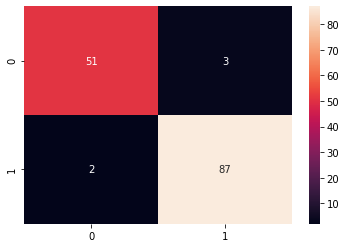

In [139]:
sns.heatmap(confusion_matrix(y_test, yp_test_b), annot=True)